In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("../Data/combined_data.csv")
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [68]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [69]:
df.duplicated().sum()

np.int64(0)

In [77]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

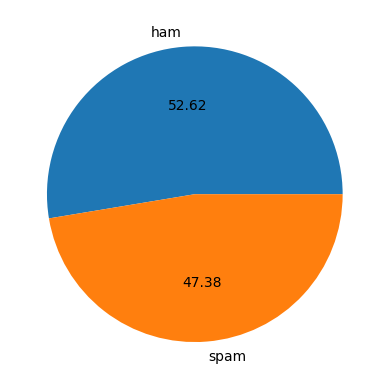

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=["ham", "spam"], autopct='%0.2f')
plt.show()

In [72]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [73]:
def text_tranformation(text):

    text_lower = text.lower()
    # text_alfnum = re.sub('[^a-z0-9]', ' ', text_lower)
    text_list = text_lower.split()
    msg = " ".join(ps.stem(word) for word in text_list if word not in stopwords.words('english'))

    return msg


In [74]:
import pandas as pd
import re
import nltk
import swifter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

def text_transformation(text):
    ps = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    
    text_lower = text.lower()
    text_list =  text_lower.split()


    return " ".join(ps.stem(word) for word in text_list if word not in stop_words)

# Use `swifter` for automatic parallelization
df["transformed_text"] = df["text"].swifter.apply(text_transformation)

print(df.head())

[nltk_data] Downloading package punkt to /Users/redskull/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/redskull/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [2]:
df.to_csv("../Data/compiled_data.csv")

NameError: name 'df' is not defined

In [ ]:
df.head()

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [3]:
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = LinearSVC()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [29]:
tf = TfidfVectorizer(ngram_range=(1,2))
cv = CountVectorizer()

In [30]:
df2 = pd.read_csv("../Data/compiled_data.csv")
df2.head()

,Unnamed: 0,label,text,transformed_text
0,0,1,ounce feather bowl hummingbird opec moment ala...,ounc feather bowl hummingbird opec moment alab...
1,1,1,wulvob get your medircations online qnb ikud v...,wulvob get medirc onlin qnb ikud viagra escape...
2,2,0,computer connection from cnn com wednesday es...,comput connect cnn com wednesday escapenumb ma...
3,3,1,university degree obtain a prosperous future m...,univers degre obtain prosper futur money earn ...
4,4,0,thanks for all your answers guys i know i shou...,thank answer guy know check rsync manual would...


In [31]:
df2[df2.isna().any(axis=1)]

,Unnamed: 0,label,text,transformed_text
9798,9798,1,here,NaN
10213,10213,1,but,NaN
24303,24303,1,our,NaN
66711,66711,1,or,NaN
76612,76612,1,no more\n,NaN
81133,81133,1,a,NaN
82316,82316,1,only,NaN


In [32]:
df2.dropna(inplace=True)

In [33]:
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  

In [34]:
df2[df2['text'].apply(len) < 50]

,Unnamed: 0,label,text,transformed_text
127,127,1,vakantie tot 26 juli !,vakanti tot 26 juli !
392,392,1,now with bit support fact sheet press room,bit support fact sheet press room
421,421,1,http obpdo cleanarm hk escapenumber,http obpdo cleanarm hk escapenumb
478,478,1,column topphpbb,column topphpbb
493,493,1,don ' t be like that . . . : )\ntororane\n,' like . . . : ) tororan
...,...,...,...,...
83031,83031,0,i concur .,concur .
83240,83240,1,top of the morning to you ! : )\ndag,top morn ! : ) dag
83314,83314,1,html message adf do you own a timeshare,html messag adf timeshar
83359,83359,0,i would assume 40000 for midcon .,would assum 40000 midcon .


In [35]:
df2[df2.isna().any(axis=1)]

,Unnamed: 0,label,text,transformed_text


In [36]:
X = df2["text"]
y = df2['label']

In [37]:
X.shape

(83441,)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58408,), (25033,), (58408,), (25033,))

In [57]:
y_train.value_counts()

label
1    30607
0    27801
Name: count, dtype: int64

In [58]:
X_train_cv = cv.fit_transform(X_train)

In [59]:
X_train_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7052146 stored elements and shape (58408, 255271)>

In [60]:
X_train_tf = tf.fit_transform(X_train)

In [61]:
X_train_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18307826 stored elements and shape (58408, 2911990)>

In [62]:
X_test_tf = tf.transform(X_test)
X_test_cv = cv.transform(X_test)

In [63]:
mnb.fit(X_train_tf, y_train)

MultinomialNB()

In [64]:

y_pred = mnb.predict(X_test_tf)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9780689489873368
[[11622   115]
 [  434 12862]]
0.9911381675271634


0.9772300563256502
[[11733   113]
 [  457 12730]]
0.9912014326870668

0.9769104781688172
[[11725   121]
 [  457 12730]]
0.9905843903198195

0.9809866187337727
[[11602   138]
 [  338 12957]]
0.9894616265750287



In [49]:
mnb.fit(X_train_cv, y_train)


MultinomialNB()

In [50]:
y_pred = mnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9738345384092997
[[11653   193]
 [  462 12725]]
0.9850596067502709


In [53]:
svc.fit(X_train_cv, y_train)

/Users/redskull/.pyenv/versions/3.12.5/envs/spamDetection/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [54]:
y_pred = svc.predict(X_test_cv)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9796268925018975
[[11595   251]
 [  259 12928]]
0.9809545489035587


In [51]:
svc.fit(X_train_tf, y_train)

LinearSVC()

In [52]:
y_pred = svc.predict(X_test_tf)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9906922861822395
[[11693   153]
 [   80 13107]]
0.9884615384615385


In [ ]:
import pickle

In [ ]:
pickle.dump(mnb, open("../Models/mnbmodel.pkl", "wb"))
pickle.dump(tf, open("../Models/svcVector.pkl", "wb"))
pickle.dump(text_transformation, open("../Models/textTransform.pkl", "wb"))